# Importing Dependencies


# Importing Dependencies


In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Reading the data


In [247]:
df = pd.read_csv("dataFiles/HINDUNILVR_cleaned.csv")
# df = df.tail(7000)

df = df[['Close','Open','Date']]
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
df.head()

,Close,Open,Date,LogReturn
0,34.623840,34.845124,1996-01-01 00:00:00+05:30,NaN
1,34.993568,34.623829,1996-01-02 00:00:00+05:30,0.010622
2,34.786304,34.993582,1996-01-03 00:00:00+05:30,-0.005941
3,34.789097,34.733077,1996-01-04 00:00:00+05:30,0.000080
4,34.733078,34.789098,1996-01-05 00:00:00+05:30,-0.001612


# Plots

In [248]:
# sns.lineplot(data = df, x = "Date", y = "Close")

In [249]:
# sns.lineplot(data = df, x = "Date", y = "LogReturn")

# ADF Test

In [250]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['LogReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -16.180738454479403
p-value: 4.269117729311195e-29
Used lags: 29
Number of observations: 7353
Critical Values:
   1%: -3.4312396483539924
   5%: -2.8619331560669066
   10%: -2.566979272680667


In [251]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Close'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 0.4229814735021841
p-value: 0.9823343184504993
Used lags: 33
Number of observations: 7350
Critical Values:
   1%: -3.431240011602706
   5%: -2.861933316570829
   10%: -2.566979358119302


# ACF and PACF plots

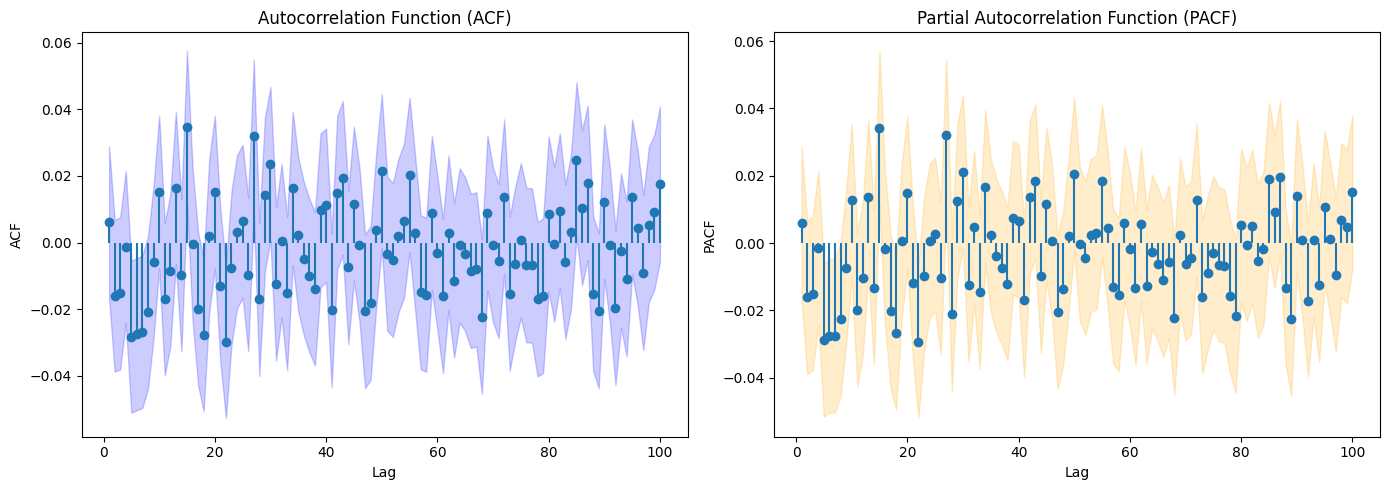

In [252]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Series without NaNs
series = df['LogReturn'].dropna()

# Compute ACF and PACF with confidence intervals
acf_vals, acf_confint = acf(series, nlags=100, alpha=0.05)  # 95% CI
pacf_vals, pacf_confint = pacf(series, nlags=100, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 101)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0] - acf_vals + acf_vals, acf_confint[:, 1] - acf_vals + acf_vals, 
                     color='blue', alpha=0.2)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0] - pacf_vals + pacf_vals, pacf_confint[:, 1] - pacf_vals + pacf_vals, 
                     color='orange', alpha=0.2)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()


# Plots

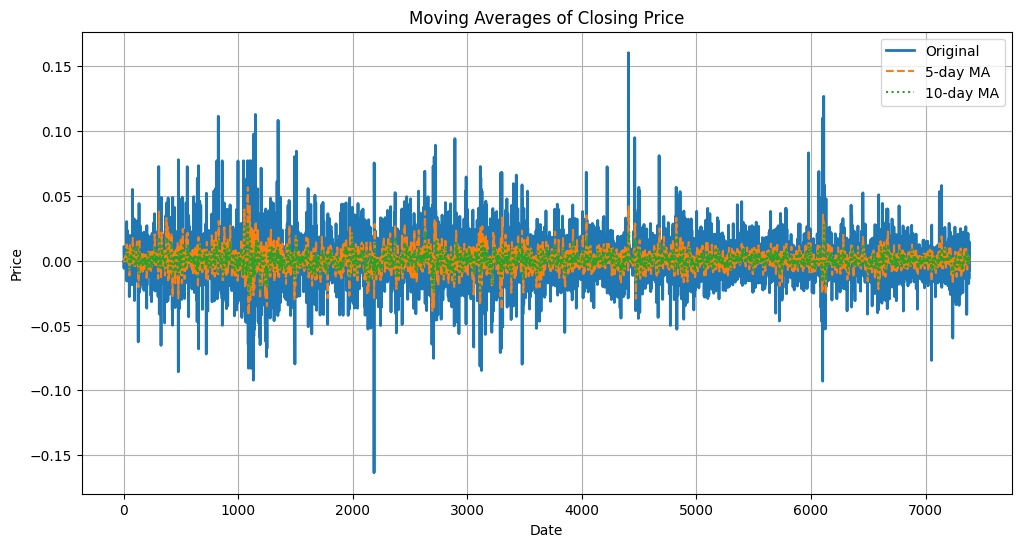

In [253]:
df['MA_5'] = df['LogReturn'].rolling(window=5).mean()
df['MA_10'] = df['LogReturn'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['LogReturn'], label='Original', linewidth=2)
plt.plot(df['MA_5'], label='5-day MA', linestyle='--')
plt.plot(df['MA_10'], label='10-day MA', linestyle=':')
plt.title('Moving Averages of Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

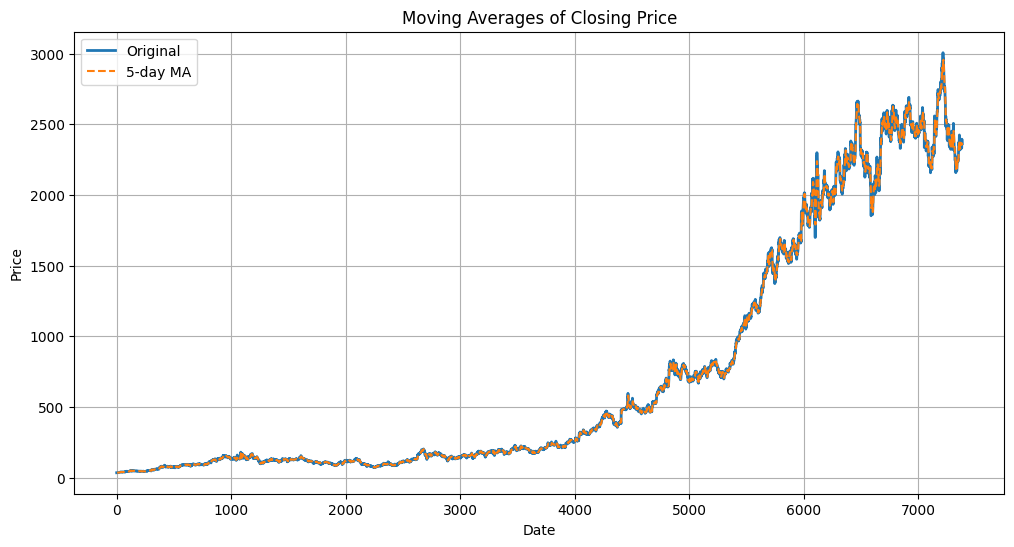

In [254]:
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original', linewidth=2)
plt.plot(df['MA_5'], label='5-day MA', linestyle='--')
# plt.plot(df['MA_10'], label='10-day MA', linewidth='')
plt.title('Moving Averages of Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [255]:
series_close = df['Close']
series_close.index = pd.to_datetime(series_close.index)
split = int(len(series_close) * 0.8)
train_close, test_close = series_close[:split], series_close[split:]

# ARMA Model

In [256]:
series = df['LogReturn']
series.index = pd.to_datetime(series.index)
split = int(len(series) * 0.8)
train, test = series[:split], series[split:]

model = ARIMA(train, order=(2,0,2))  # Order can be tuned here
fitted_model = model.fit()
print(fitted_model.summary())

/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/anku

                               SARIMAX Results                                
Dep. Variable:              LogReturn   No. Observations:                 5907
Model:                 ARIMA(2, 0, 2)   Log Likelihood               15106.764
Date:                Fri, 11 Jul 2025   AIC                         -30201.527
Time:                        12:40:17   BIC                         -30161.424
Sample:                    01-01-1970   HQIC                        -30187.589
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      2.640      0.008       0.000       0.001
ar.L1          0.0077      1.438      0.005      0.996      -2.811       2.827
ar.L2         -0.0059      0.871     -0.007      0.9

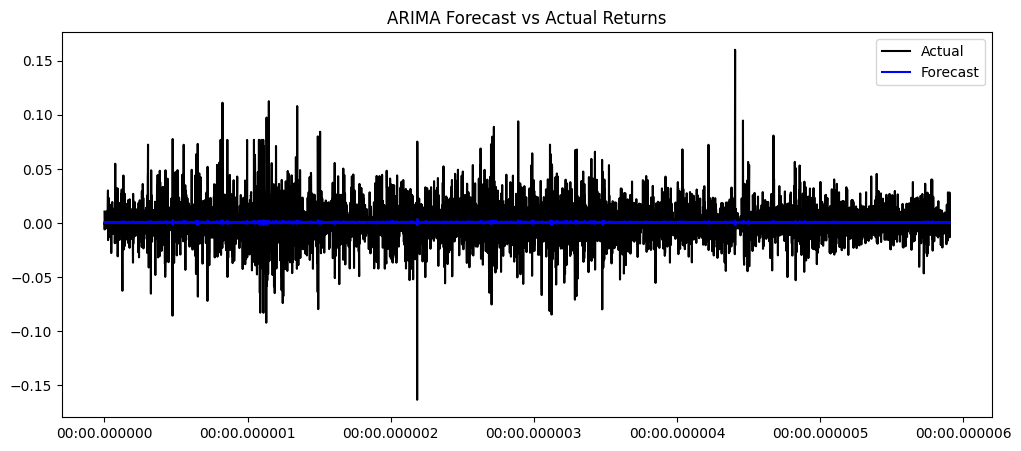

In [257]:
forecast = fitted_model.get_forecast(steps=len(train))
# mean_forecast = forecast.predicted_mean
predict = fitted_model.predict(start =train.index[0], end = train.index[-1])


plt.figure(figsize=(12,5))
plt.plot( train, label='Actual', color = 'black')
plt.plot( predict, label='Forecast', color = 'blue')
plt.legend()
plt.title('ARIMA Forecast vs Actual Returns')
plt.show()

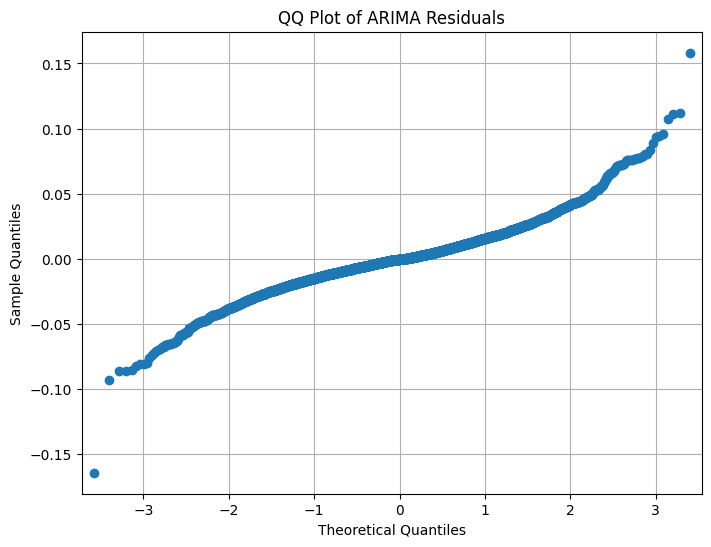

In [258]:
from statsmodels.graphics.gofplots import qqplot

residuals = fitted_model.resid

# QQ Plot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of ARIMA Residuals')
plt.grid(True)
plt.show()

In [259]:
first_close = df['Close'].iloc[0]

# Reconstruct the Close prices
recClose = first_close * np.exp(predict.cumsum())
recClose = pd.Series(recClose, index=train_close.index[1:])  # or appropriate slice



RMSE = 129.1968
MAE  = 100.7909
R²: 0.8831


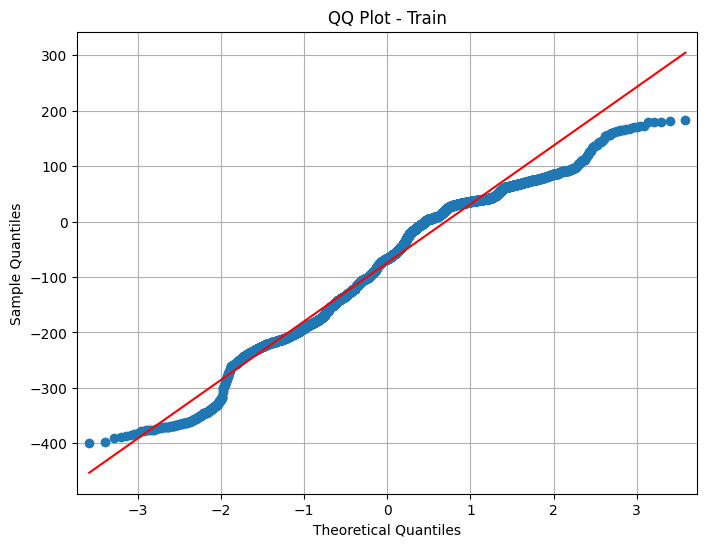

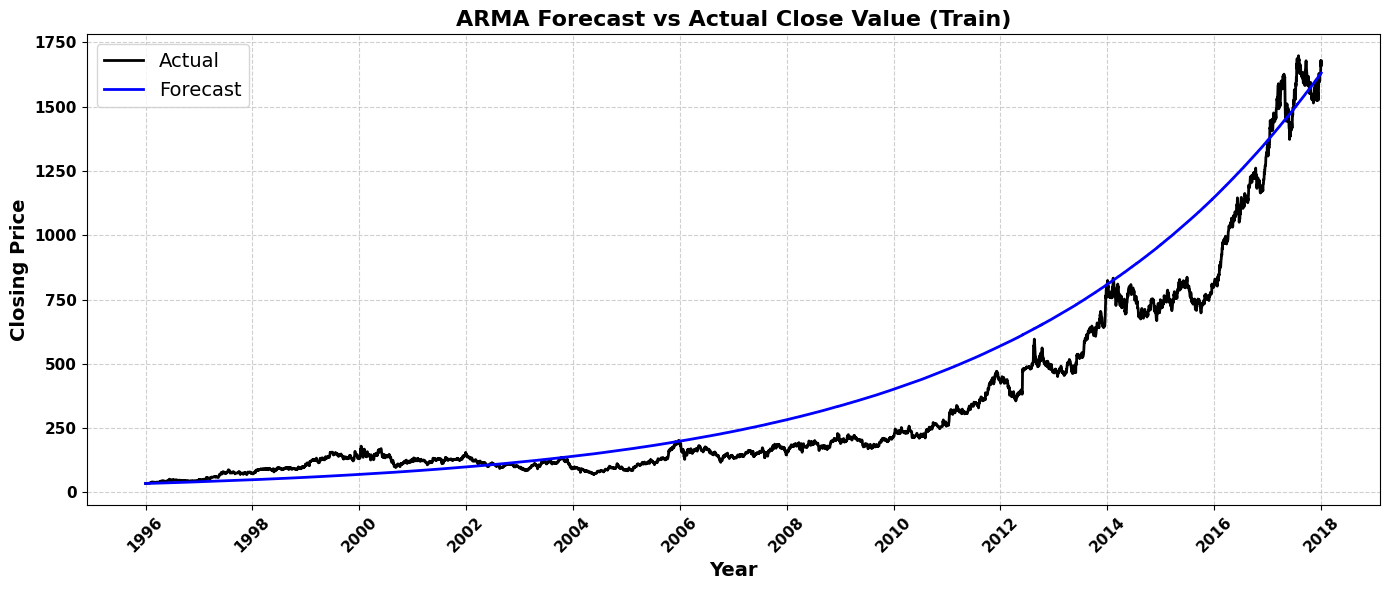

In [261]:
eval_df = pd.DataFrame({'actual': train_close.dropna(), 'predicted': recClose.dropna()}).dropna()

rmse = np.sqrt(mean_squared_error(eval_df['actual'], eval_df['predicted']))
mae = mean_absolute_error(eval_df['actual'], eval_df['predicted'])
directional_accuracy = (np.sign(eval_df['actual']) == np.sign(eval_df['predicted'])).mean()
r2_forecast = r2_score(eval_df['actual'], eval_df['predicted'])


print(f"RMSE = {rmse:.4f}")
print(f"MAE  = {mae:.4f}")
# print(f"Directional Accuracy = {directional_accuracy:.2%}")
print(f'R²: {r2_forecast:.4f}')

residuals = eval_df['actual'] - eval_df['predicted']
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot - Train')
plt.grid(True)
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Create fake "years" for x-axis (adjust length to your data)
years = np.arange(1996, 2020, 2)  # 1996 to 2025 in 2-year steps

# Create evenly spaced tick positions for years
tick_positions = np.linspace(0, len(eval_df)-1, len(years)).astype(int)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(eval_df['actual'].values, label='Actual', color='black', linewidth=2)
plt.plot(eval_df['predicted'].values, label='Forecast', color='blue', linewidth=2)

# Title and labels
plt.title('ARMA Forecast vs Actual Close Value (Train)', fontsize=16, fontweight='semibold')
plt.xlabel('Year', fontsize=14, fontweight='semibold')
plt.ylabel('Closing Price', fontsize=14, fontweight='semibold')

# Apply manual x-axis ticks and labels
plt.xticks(tick_positions, years, fontsize=11, fontweight='bold', rotation=45)
plt.yticks(fontsize=11, fontweight='bold')

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()
